# Importing Necessary Libraries

### Overview of Libraries
This project imports necessary libraries for preprocessing, data manipulation, visualisation, clustering (KMeans, hierarchical), machine learning (Random Forest, SVM), deep learning (Keras/TensorFlow), dimensionality reduction (PCA, t-SNE), and clustering. It also has tools for hyperparameter optimisation (Optuna) and model interpretability (SHAP).




In [ ]:
# Core Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Metrics and Evaluation
from sklearn.metrics import (
    silhouette_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

# Train-Test Split
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Model Interpretability and Optimization
import shap
import optuna

# Data Loading

### Dataset File Loading
The primary `class.csv` dataset plus an additional dataset unique to the "Android-Universal-Image-Loader" directory are loaded in this cell. It gracefully manages file not found issues, making sure the paths are examined and corrected as needed.




In [ ]:
# Path for the main `class.csv` file
main_class_file_path = '/kaggle/input/class.csv'

# Load the main `class.csv` file
try:
    main_class_data = pd.read_csv(main_class_file_path)
    print("Main Class Dataset Head:")
except FileNotFoundError:
    print("Main class.csv file not found. Please check the path.")

# Example: Load `class.csv` from the "Android-Universal-Image-Loader" directory in `full`
android_class_file_path = '/kaggle/input/BugHunterDataset-1.0/full/Android-Universal-Image-Loader/class.csv'

try:
    android_class_data = pd.read_csv(android_class_file_path)
    print("\nAndroid-Universal-Image-Loader Class Dataset Head:")
except FileNotFoundError:
    print("Android-Universal-Image-Loader class.csv file not found. Please check the path.")

Main Class Dataset Head:

Android-Universal-Image-Loader Class Dataset Head:


### Main Class Dataset for Exploratory Data Analysis (EDA)
1. **Dataset Preview**: Provides a brief overview of the dataset by displaying the first five rows.
2. Data types, column names, and non-null counts are displayed in the **Dataset Summary** to evaluate the data structure.

3. **Missing Values**: Determines which columns contain missing data so that cleaning procedures can be planned.
4. Statistics summaries for numerical columns are provided by the fourth section, **Descriptive Statistics**.
5. **category Analysis**: To comprehend data diversity, this method lists each category column's unique values together with their numbers.



In [ ]:
# Display the first few rows of the main class dataset
print("First 5 rows of Main Class Dataset:")
display(main_class_data.head())

# Show a summary of the dataset (column names, data types, non-null counts)
print("\nDataset Information:")
print(main_class_data.info())

# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(main_class_data.isnull().sum())

# Display basic descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(main_class_data.describe())

# Display unique values and their counts for each categorical column
print("\nUnique Value Counts for Categorical Columns:")
for col in main_class_data.select_dtypes(include=['object']).columns:
    print(f"\n{col} - Unique Values and Counts:")
    print(main_class_data[col].value_counts())

First 5 rows of Main Class Dataset:


Project                                      Hash  \
0  antlr4  b4a53d56d4324739e823344237c4d7fdf6cac90c   
1  antlr4  dc2c9b039e1497ad924c852e07f3a8f981ed078b   
2  antlr4  6de95c15e73d7bb092b1519405cd0f1859e63e8b   
3  antlr4  6de95c15e73d7bb092b1519405cd0f1859e63e8b   
4  antlr4  a6e7a72ac767d73e6f760750b53b13e2e89d7261   

                                       LongName        CC  CCL  CCO  CI  \
0        org.antlr.v4.semantics.SymbolCollector  0.000000    0    0   0   
1  org.antlr.v4.test.tool.TestActionTranslation  0.032441    2    2   2   
2       org.antlr.v4.test.TestSemPredEvalParser  0.761986   23   55  55   
3   org.antlr.v4.runtime.atn.ParserATNSimulator  0.040439    1    6   2   
4               org.antlr.v4.runtime.Recognizer  0.000000    0    0   0   

        CLC      CLLC  LDC  ...  Migration15 Rules  Naming Rules  \
0  0.000000  0.000000    0  ...                  0             9   
1  0.047297  0.055851   21  ...                  0             2   
2  0.695187  0.791111  390  ...                  0             0   
3  0.031144  0.043133   46  ...                  0            15   
4  0.000000  0.000000    0  ...                  0             9   

   Optimization Rules  Security Code Guideline Rules  Strict Exception Rules  \
0                   0                              0                       0   
1                   0                              0                       0   
2                   0                              0                       0   
3                   0                              1                       0   
4                   0                              0                       1   

   String and StringBuffer Rules  Type Resolution Rules  \
0                              0                      0   
1                              8                     95   
2                             10                     22   
3                              0                      0   
4                              0                      0   

   Unnecessary and Unused Code Rules  Vulnerability Rules  Number of Bugs  
0                                  0                    0               1  
1                                 56                    0               1  
2                                  1                    0               0  
3                                  0                    0               0  
4                                  0                    0               1  

[5 rows x 99 columns]


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84562 entries, 0 to 84561
Data columns (total 99 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Project                            84562 non-null  object 
 1   Hash                               84562 non-null  object 
 2   LongName                           84562 non-null  object 
 3   CC                                 84562 non-null  float64
 4   CCL                                84562 non-null  int64  
 5   CCO                                84562 non-null  int64  
 6   CI                                 84562 non-null  int64  
 7   CLC                                84562 non-null  float64
 8   CLLC                               84562 non-null  float64
 9   LDC                                84562 non-null  int64  
 10  LLDC                               84562 non-null  int64  
 11  LCOM5                           

CC           CCL           CCO            CI           CLC  \
count  84562.000000  84562.000000  84562.000000  84562.000000  84562.000000   
mean       0.134423      2.458161     15.311913      6.365436      0.117876   
std        0.244580     16.410599    400.076061     78.301175      0.225439   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.167372      2.000000      6.000000      2.000000      0.138889   
max        1.000000    499.000000  75576.000000   4735.000000      1.000000   

               CLLC           LDC          LLDC         LCOM5            NL  \
count  84562.000000  84562.000000  84562.000000  84562.000000  84562.000000   
mean       0.125763     42.794506     37.816419      2.410373      2.413141   
std        0.232476    237.198409    216.424844      4.180393      3.221344   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      1.000000   
50%        0.000000      0.000000      0.000000      1.000000      2.000000   
75%        0.156250     26.000000     23.000000      2.000000      3.000000   
max        1.000000   8282.000000   8236.000000    129.000000     84.000000   

       ...  Migration15 Rules  Naming Rules  Optimization Rules  \
count  ...            84562.0  84562.000000        84562.000000   
mean   ...                0.0      1.520991            0.301317   
std    ...                0.0     13.083271            1.487349   
min    ...                0.0      0.000000            0.000000   
25%    ...                0.0      0.000000            0.000000   
50%    ...                0.0      0.000000            0.000000   
75%    ...                0.0      1.000000            0.000000   
max    ...                0.0   1271.000000           45.000000   

       Security Code Guideline Rules  Strict Exception Rules  \
count                   84562.000000            84562.000000   
mean                        0.099087                1.204028   
std                         0.588767                4.797747   
min                         0.000000                0.000000   
25%                         0.000000                0.000000   
50%                         0.000000                0.000000   
75%                         0.000000                1.000000   
max                        13.000000              318.000000   

       String and StringBuffer Rules  Type Resolution Rules  \
count                   84562.000000           84562.000000   
mean                        1.389868               1.678934   
std                         6.098808               5.415771   
min                         0.000000               0.000000   
25%                         0.000000               0.000000   
50%                         0.000000               0.000000   
75%                         0.000000               1.000000   
max                       237.000000             160.000000   

       Unnecessary and Unused Code Rules  Vulnerability Rules  Number of Bugs  
count                       84562.000000         84562.000000    84562.000000  
mean                            0.464121             0.000012        0.689222  
std                             4.800264             0.003439        0.907474  
min                             0.000000             0.000000        0.000000  
25%                             0.000000             0.000000        0.000000  
50%                             0.000000             0.000000        0.000000  
75%                             0.000000             0.000000        1.000000  
max                           579.000000             1.000000       12.000000  

[8 rows x 96 columns]


Unique Value Counts for Categorical Columns:

Project - Unique Values and Counts:
Project
elasticsearch                     31644
hazelcast                         28185
netty                              6591
orientdb                           4770
neo4j                              4669
BroadleafCommerce                  3241
ceylon-ide-eclipse                 1477
MapDB                              1009
mcMMO                               868
oryx                                646
titan                               506
antlr4                              362
junit                               338
Android-Universal-Image-Loader      184
mct                                  72
Name: count, dtype: int64

Hash - Unique Values and Counts:
Hash
a60b8948ba1d836a6eac7cff095519e618939ed8    566
e6aaaf11ed4a1b8f595f920de1840938eddb7a97    560
78574d248cf10dad1c5a566fda79e1e0c94afe43    557
2bd09c4625898d77aa6c015c6f82cf973ed18cb7    363
3d13c27fa0df12018f35f1b20987c90277e9b6f9    363
    

# Exploratory Data Analysis Visualization

### Putting Numerical Features into Visual Form
1. **Histograms**: Use KDE overlays to visualise the distributions of all numerical features. For clarity, use a vivid `viridis` colour scheme.
2. **Boxplots**: Showcase improved boxplots to spot data dispersed among numerical features and outliers.

These visualisations offer thorough insights into the numerical characteristics of the dataset.



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

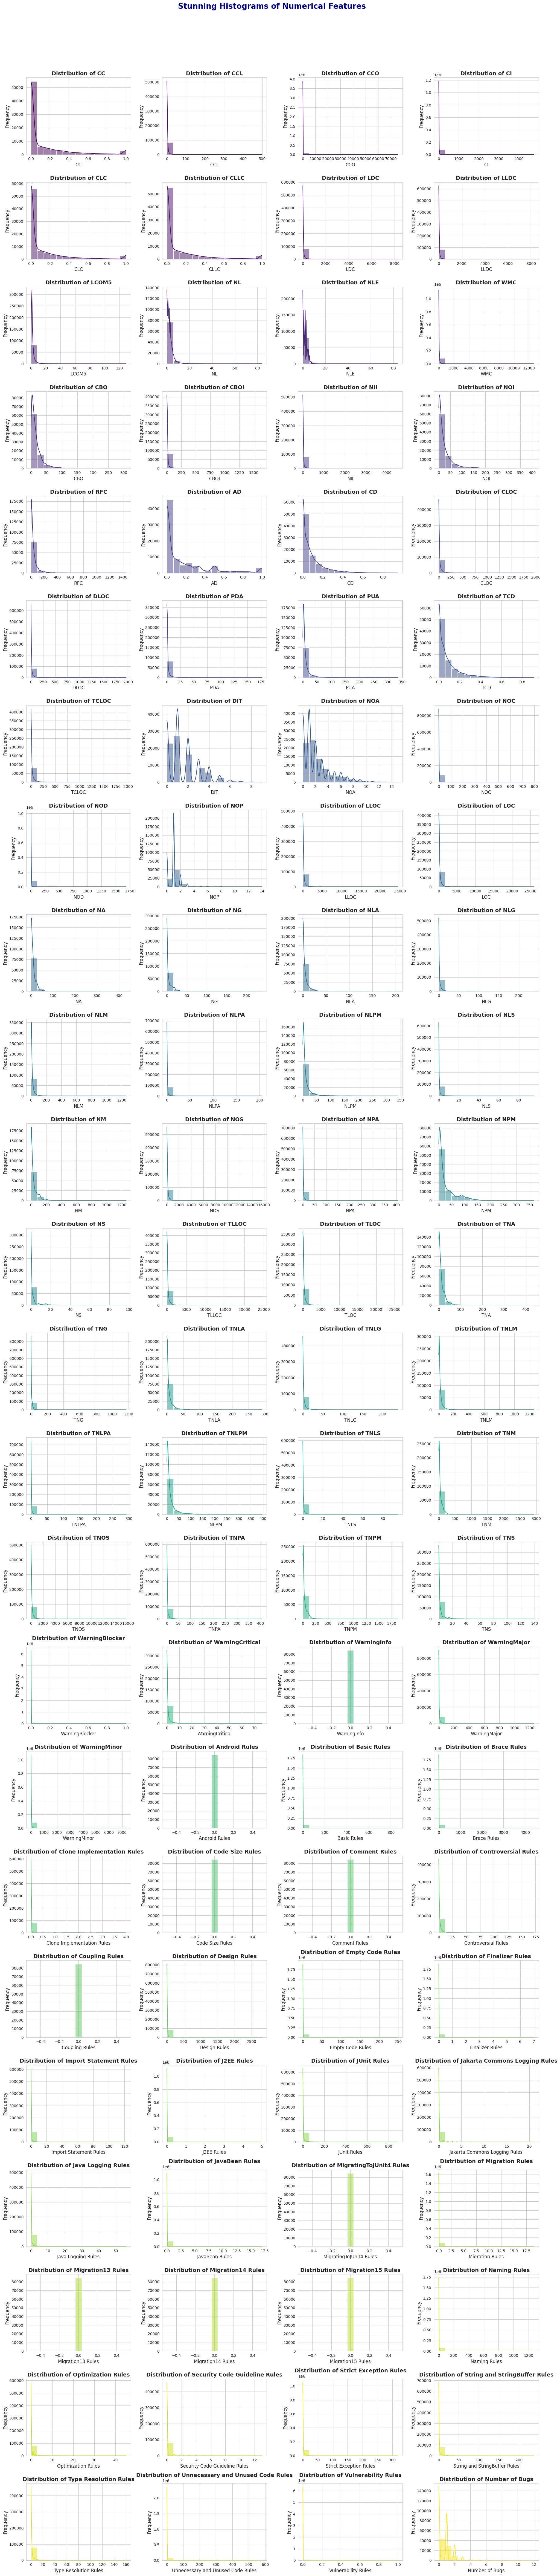

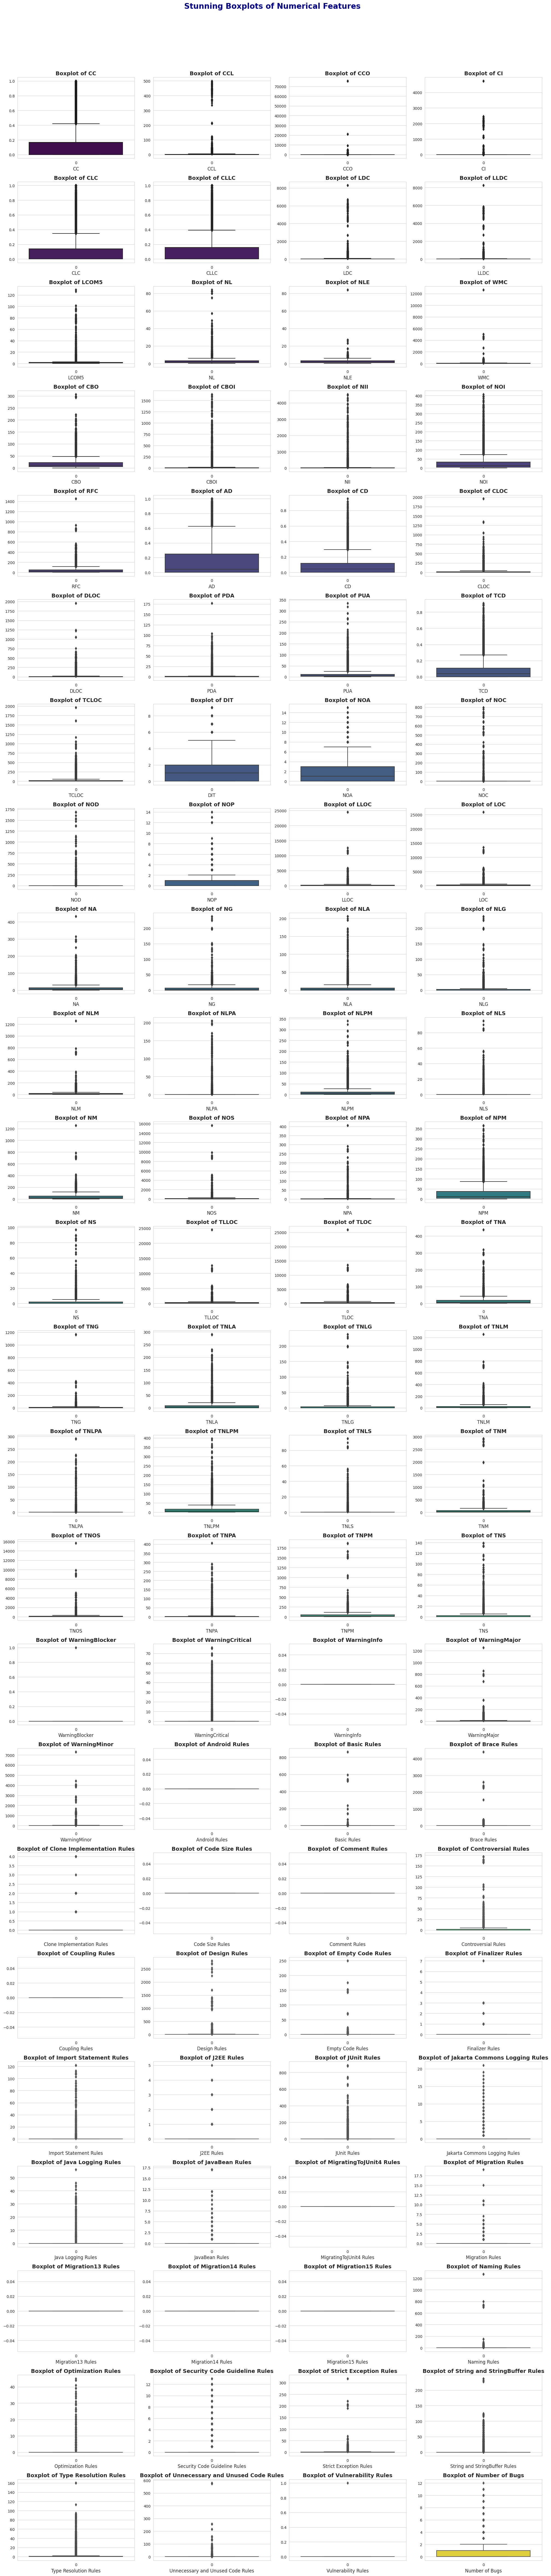

In [ ]:
# Set a vibrant color palette for the plots
sns.set_palette("viridis")
sns.set_style("whitegrid")

# Select numerical columns
numerical_columns = main_class_data.select_dtypes(include=['float64', 'int64']).columns

# Generate enough colors for all columns
colors = sns.color_palette("viridis", n_colors=len(numerical_columns))

# Dynamically calculate rows and columns for subplots
n_cols = 4  # Fixed number of columns
n_rows = -(-len(numerical_columns) // n_cols)  # Ceiling division for rows

# Histograms for numerical columns
plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size based on grid
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Dynamically adjust subplot grid
    sns.histplot(main_class_data[col], kde=True, bins=15, color=colors[i - 1])
    plt.title(f"Distribution of {col}", fontsize=14, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

plt.suptitle("Stunning Histograms of Numerical Features", fontsize=20, weight='bold', color='darkblue')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Enhanced Boxplots for numerical columns
plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=main_class_data[col], color=colors[i - 1])
    plt.title(f"Boxplot of {col}", fontsize=14, weight='bold')
    plt.xlabel(col, fontsize=12)

plt.suptitle("Stunning Boxplots of Numerical Features", fontsize=20, weight='bold', color='darkblue')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### PCA Visualisation and Clustering
1. **Clustering**: Data is grouped into three clusters using KMeans clustering after numerical features are standardised.
2. **Dimensionality Reduction**: In order to visualise the dataset, PCA divides it into two primary components.

3. **Cluster Plot**: Using PCA-transformed data, clusters are displayed using a scatter plot, offering lucid insights on data grouping.



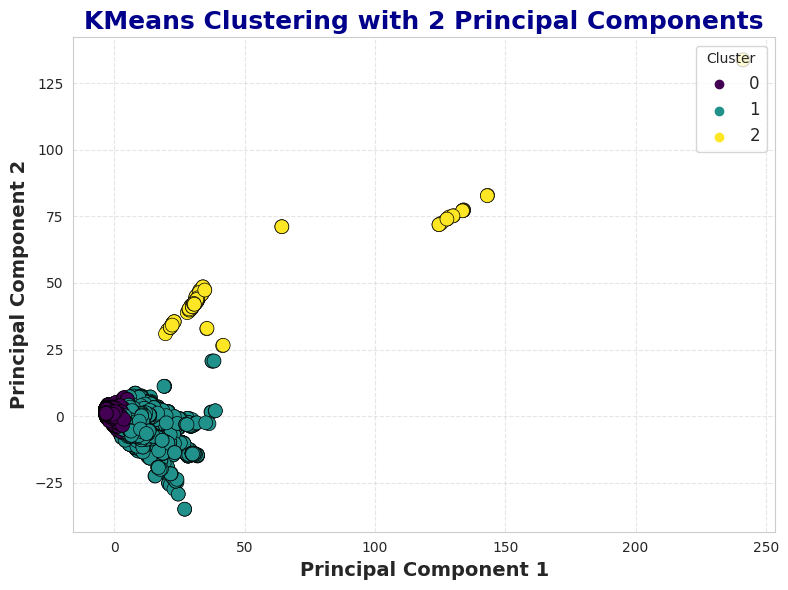

In [ ]:
# Step 1: Select numerical columns for clustering
numerical_data = main_class_data.select_dtypes(include=['float64', 'int64'])

# Step 2: Handle missing values by filling with the mean
numerical_data = numerical_data.fillna(numerical_data.mean())

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Ensure reproducibility and suppress warnings
kmeans.fit(scaled_data)

# Add cluster labels to the original data
main_class_data['Cluster'] = kmeans.labels_

# Step 5: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results with cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Step 6: Enhanced visualization of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=pca_df,
    palette='viridis',
    s=100,
    edgecolor='black',
    linewidth=0.5
)

# Title and labels
plt.title('KMeans Clustering with 2 Principal Components', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Principal Component 1', fontsize=14, weight='bold')
plt.ylabel('Principal Component 2', fontsize=14, weight='bold')
plt.legend(title='Cluster', fontsize=12, loc='upper right', fancybox=True)
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 'Number of Bugs' Distribution
This improved histogram uses a vivid blue colour with KDE overlay and intricate design to display the distribution of the `Number of Bugs` feature. The plot makes it easier to see trends or abnormalities by highlighting the frequency and distribution of bug counts.





use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


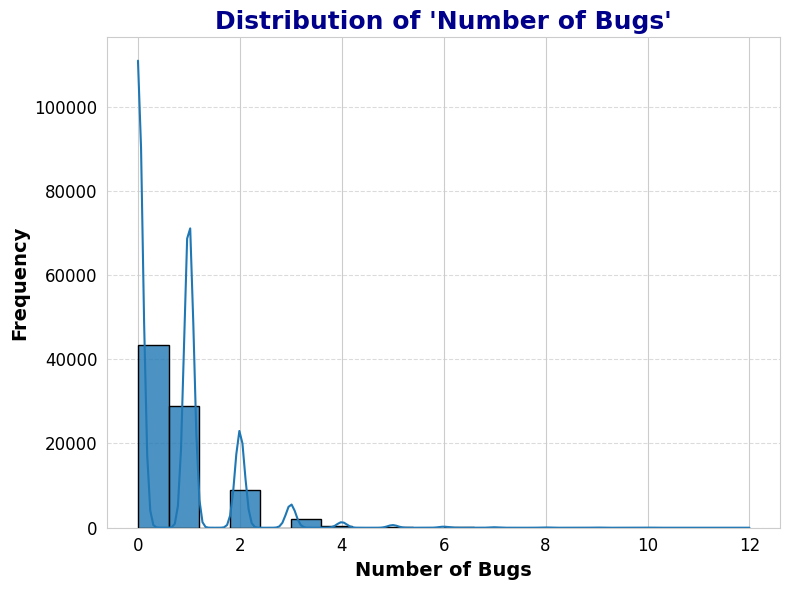

In [ ]:
# Enhanced Distribution Plot for "Number of Bugs"
plt.figure(figsize=(8, 6))  # Wider figure for better visualization
sns.histplot(
    main_class_data['Number of Bugs'],
    kde=True,
    bins=20,  # Increased number of bins for smoother visualization
    color='#1f77b4',  # Vibrant blue color
    edgecolor='black',  # Add edges for clarity
    alpha=0.8  # Slight transparency for a polished look
)

# Styling the plot
plt.title("Distribution of 'Number of Bugs'", fontsize=18, weight='bold', color='darkblue')
plt.xlabel("Number of Bugs", fontsize=14, weight='bold', color='black')
plt.ylabel("Frequency", fontsize=14, weight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Tight layout for a clean appearance
plt.tight_layout()
plt.show()

### Distributions of Features Among Clusters
The distribution of important attributes (such as `Number of Bugs`) among the clusters found by KMeans is contrasted in this visualisation. KDE plots show the differences in features within each cluster, revealing information about their properties and separation.




use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


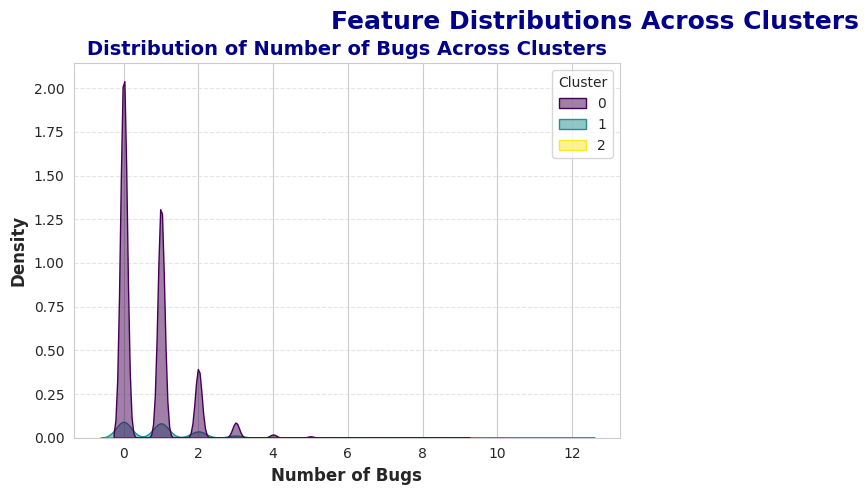

In [ ]:
# Plot distributions of key features within each cluster
features = ['Number of Bugs']  # Add more features as needed
n_cols = 2  # Number of columns for the subplot grid
n_rows = -(-len(features) // n_cols)  # Calculate rows dynamically

plt.figure(figsize=(n_cols * 6, n_rows * 5))  # Dynamically adjust figure size
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(
        data=main_class_data,
        x=feature,
        hue="Cluster",
        fill=True,
        alpha=0.5,
        palette="viridis"
    )
    plt.title(f"Distribution of {feature} Across Clusters", fontsize=14, weight='bold', color='darkblue')
    plt.xlabel(feature, fontsize=12, weight='bold')
    plt.ylabel("Density", fontsize=12, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout and title position
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reserve space at the top for the title
plt.suptitle("Feature Distributions Across Clusters",
             fontsize=18, weight='bold', color='darkblue', ha='center', va='top', y=0.98)
plt.show()

### Heatmap of Feature Correlation
The top 20 numerical features, chosen for their absolute correlation values, are shown in this heatmap along with their correlations. Strong positive and negative connections are highlighted by the vivid `coolwarm` palette, which facilitates feature selection and multicollinearity analysis.




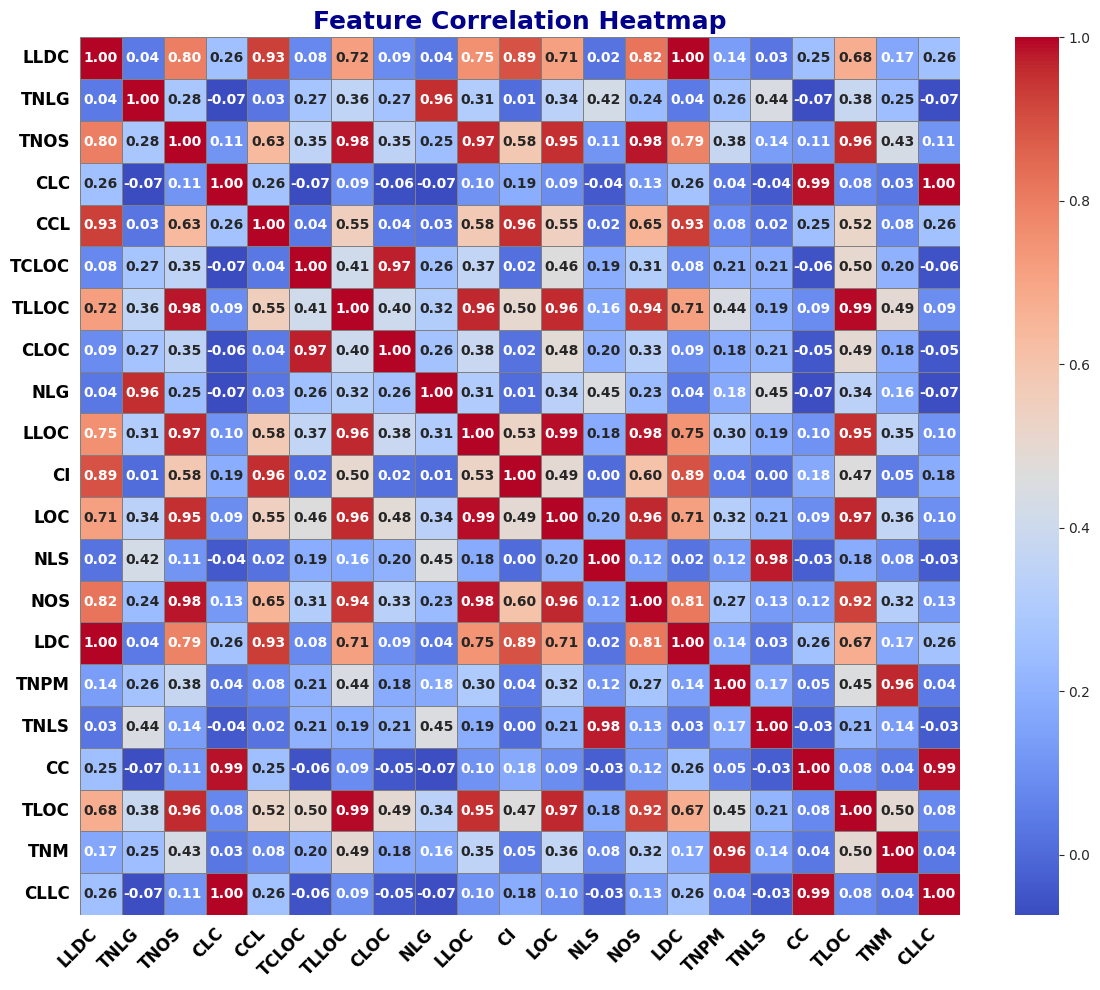

In [ ]:
# Step 1: Calculate the correlation matrix for numerical features
numerical_columns = main_class_data.select_dtypes(include='number').columns.tolist()
corr_matrix = main_class_data[numerical_columns].corr()

# Step 2: Identify the top 20 features based on correlation magnitude
# Flatten the correlation matrix and sort by absolute correlation
corr_flat = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
top_corr_pairs = corr_flat[corr_flat < 1.0][:20]  # Remove perfect self-correlations
top_features = list(set([index for pair in top_corr_pairs.index for index in pair]))

# Step 3: Filter the correlation matrix for the top 20 features
corr_matrix_main = corr_matrix.loc[top_features, top_features]

# Step 4: Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix_main,
    annot=True,  # Annotate correlations
    fmt=".2f",  # Format the numbers with two decimals
    cmap="coolwarm",  # Vibrant color palette
    annot_kws={"size": 10, "weight": "bold"},  # Stylish annotations
    cbar=True,  # Show the color bar
    linewidths=0.5,  # Add gridlines
    linecolor='gray'
)

# Styling the plot
plt.title("Feature Correlation Heatmap", fontsize=18, weight='bold', color='darkblue')
plt.xticks(fontsize=12, rotation=45, ha='right', weight='bold', color='black')
plt.yticks(fontsize=12, rotation=0, weight='bold', color='black')
plt.tight_layout()
plt.show()

# Data Preprocessing & Feature Engineering

# Feature engineering and data preprocessing

1. **Date Feature Extraction**: Take a binary `IsWeekend` indication and extract `Year`, `Month`, `Day`, and `DayOfWeek` from the 'Date' column.
2. Use frequency encoding for high-cardinality columns and one-hot encoding for low-cardinality ones in the **categorical transformation** step.
3. **Handle Missing Values**: Use the column mean to substitute missing numerical values.
4. **Outlier Removal**: Use the IQR approach to clip extreme values.
5. **Scaling and PCA**: Use `StandardScaler` to standardise numerical features and optionally use PCA (5 components) to reduce dimensionality.


In [ ]:
# Ensure there is data to process
if 'Date' in main_class_data.columns:
    # Extract patterns from the 'Date' column
    main_class_data['Date'] = pd.to_datetime(main_class_data['Date'])
    main_class_data['Year'] = main_class_data['Date'].dt.year
    main_class_data['Month'] = main_class_data['Date'].dt.month
    main_class_data['Day'] = main_class_data['Date'].dt.day
    main_class_data['DayOfWeek'] = main_class_data['Date'].dt.dayofweek  # Monday=0, Sunday=6
    main_class_data['IsWeekend'] = main_class_data['DayOfWeek'].isin([5, 6]).astype(int)  # Binary weekend indicator

# Extract meaningful patterns from categorical data
categorical_columns = main_class_data.select_dtypes(include=['object']).columns

# If categorical columns exist, apply transformations
if not categorical_columns.empty:
    # One-hot encoding for low-cardinality columns
    main_class_data = pd.get_dummies(main_class_data, columns=categorical_columns, drop_first=True)

    # Frequency encoding for high-cardinality categorical columns
    high_cardinality_columns = [
        col for col in categorical_columns if col in main_class_data.columns and main_class_data[col].nunique() > 10
    ]
    for col in high_cardinality_columns:
        freq_encoding = main_class_data[col].value_counts(normalize=True)
        main_class_data[col + '_freq'] = main_class_data[col].map(freq_encoding)
        # Drop the original column
        main_class_data.drop(columns=[col], inplace=True)

# Handling Missing Values
numerical_columns = main_class_data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    main_class_data[col].fillna(main_class_data[col].mean(), inplace=True)

# Handling Outliers
for col in numerical_columns:
    Q1 = main_class_data[col].quantile(0.25)
    Q3 = main_class_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    main_class_data = main_class_data[(main_class_data[col] >= lower_bound) & (main_class_data[col] <= upper_bound)]

# Scaling Numerical Features
scaler = StandardScaler()
main_class_data[numerical_columns] = scaler.fit_transform(main_class_data[numerical_columns])

# Optional Dimensionality Reduction
pca = PCA(n_components=5)  # Choose the number of components based on explained variance
principal_components = pca.fit_transform(main_class_data[numerical_columns])

# Combine PCA results with the original dataset
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])
main_class_data = pd.concat([main_class_data.reset_index(drop=True), pca_df], axis=1)

# Display the transformed and cleaned data
print("\nData after Feature Engineering and Preprocessing:")
main_class_data.head()

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Data after Feature Engineering and Preprocessing:


CC  CCL  CCO   CI  CLC  CLLC  LDC  LLDC    LCOM5        NL  ...  \
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.07729 -0.473638  ...   
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.07729 -0.473638  ...   
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.07729  1.283204  ...   
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.07729 -0.473638  ...   
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.07729 -0.473638  ...   

   LongName_upgrade.StoreUpgraderTest  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   LongName_usercodedeployment.EntryProcessorWithAnonymousAndInner  \
0                                              False                 
1                                              False                 
2                                              False                 
3                                              False                 
4                                              False                 

   LongName_usercodedeployment.EntryProcessorWithAnonymousAndInner$1  \
0                                              False                   
1                                              False                   
2                                              False                   
3                                              False                   
4                                              False                   

   LongName_usercodedeployment.EntryProcessorWithAnonymousAndInner$Test  \
0                                              False                      
1                                              False                      
2                                              False                      
3                                              False                      
4                                              False                      

   LongName_visibility.TestDatasourceCommitOrderDataVisibility       PC1  \
0                                              False           -1.996826   
1                                              False           -1.720132   
2                                              False            5.047638   
3                                              False           -1.769030   
4                                              False           -1.769030   

        PC2       PC3       PC4       PC5  
0 -1.701871 -0.109163 -0.294527  0.869869  
1 -1.231379 -0.800074  0.131285  0.819635  
2 -1.866131  0.599972 -0.694180  0.783170  
3 -1.380914 -0.688841  0.058111  0.837803  
4 -1.380914 -0.688841  0.058111  0.837803  

[5 rows x 35304 columns]

# Advanced Preprocessing

# Clustering Analysis: Silhouette Score and Elbow Method

1. **Synthetic Data Simulation**: To simulate scaled data preparation, a synthetic dataset consisting of 100 samples and 5 features is standardised.
2. **Elbow Method**: To find the \"elbow\" point, the inertia (sum of squared distances to cluster centres) is shown for cluster sizes 2 to 10.

3. **Silhouette Scores**: To assess the quality of clustering for varying cluster sizes, silhouette scores are calculated.
4. **Optimal Clusters**: The ideal cluster count is determined by taking the number of clusters that have the highest silhouette score.



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

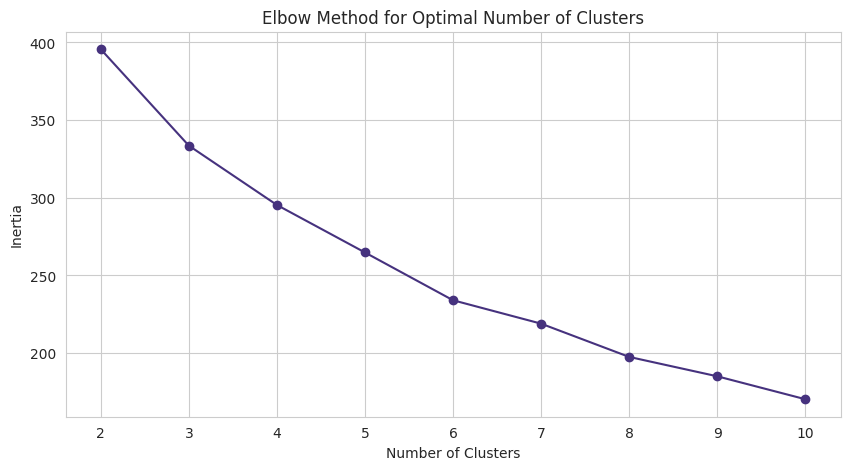

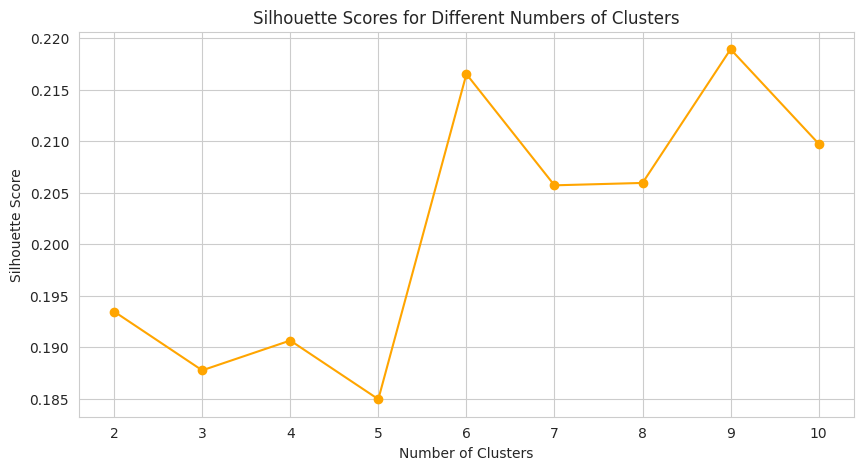

9

In [ ]:
# Simulating the scaled_data setup since the original dataset isn't available
# This should be replaced with actual `scaled_data` from the user's context
# For demonstration, I'll create synthetic data
np.random.seed(42)
synthetic_data = pd.DataFrame(
    np.random.rand(100, 5),  # 100 samples, 5 features
    columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']
)

# Standardizing the synthetic data (replicating original preprocessing steps)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(synthetic_data)

# Elbow Method and Silhouette Score Analysis
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Testing cluster sizes from 2 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)  # Append inertia (sum of squared distances to cluster centers)

    # Compute silhouette score only if there is more than one cluster
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Identifying the optimal number of clusters from the plots
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
optimal_n_clusters

# Hierarchical clustering

# Clustering Analysis: Silhouette Score and Elbow Method

1. **Synthetic Data Simulation**: To simulate scaled data preparation, a synthetic dataset consisting of 100 samples and 5 features is standardised.
2. **Elbow Method**: To find the \"elbow\" point, the inertia (sum of squared distances to cluster centres) is shown for cluster sizes 2 to 10.

3. **Silhouette Scores**: To assess the quality of clustering for varying cluster sizes, silhouette scores are calculated.
4. **Optimal Clusters**: The ideal cluster count is determined by taking the number of clusters that have the highest silhouette score.



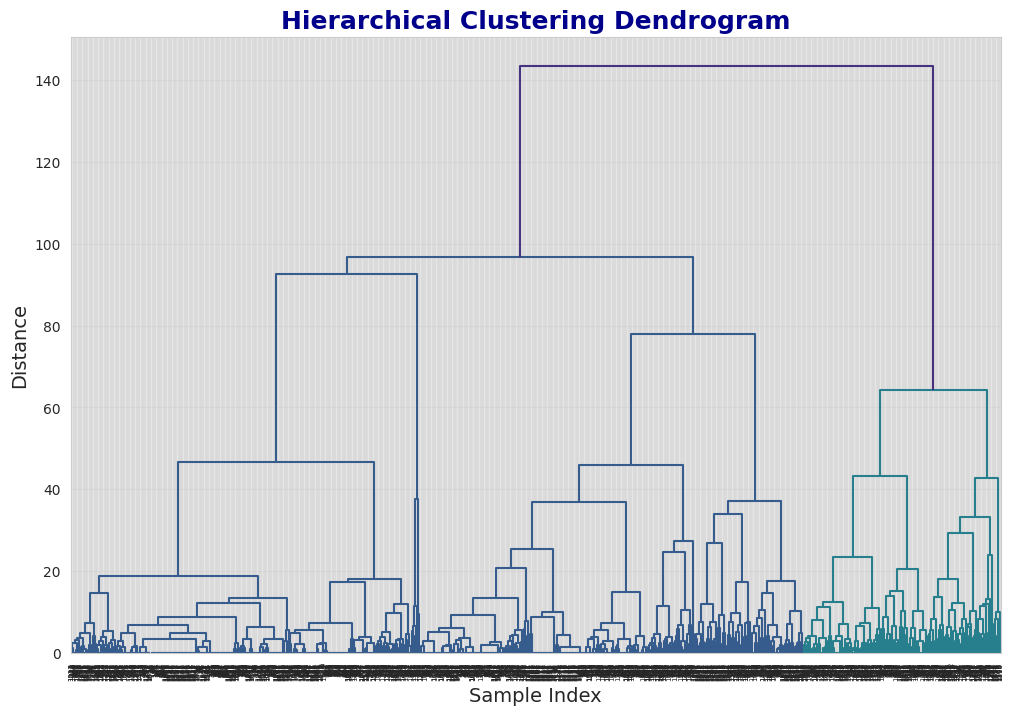

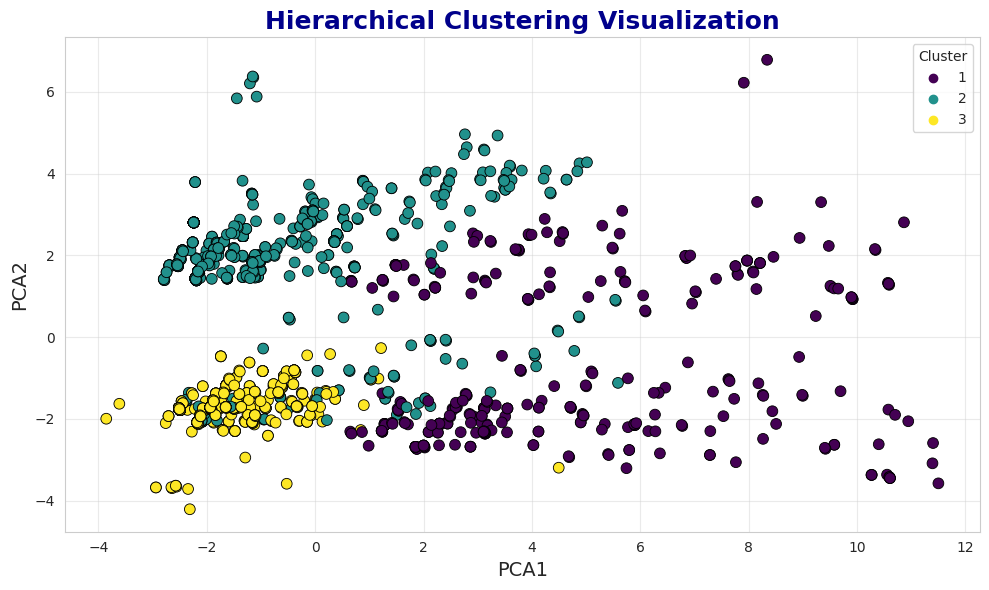

In [ ]:
# Step 1: Preprocessing numerical data
numerical_columns = main_class_data.select_dtypes(include=['float64', 'int64']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(main_class_data[numerical_columns])

# Step 2: Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')  # 'ward' minimizes variance within clusters

# Step 3: Assign clusters
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

# Add Hierarchical cluster labels to the dataset
main_class_data['Hierarchical_Cluster'] = hierarchical_labels

# Step 4: PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA visualization
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Hierarchical_Cluster'] = hierarchical_labels

# Step 5: Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

# Step 6: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Hierarchical_Cluster',
    data=pca_df,
    palette='viridis',
    s=60,
    edgecolor='k'
)
plt.title('Hierarchical Clustering Visualization', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# KMeans Clustering with the Ideal Cluster Count

1. **Data Preprocessing**: To guarantee consistency in clustering, numerical columns are scaled using `StandardScaler`.
2. **Optimal Clusters**: Nine clusters were determined to be the ideal number using the silhouette score.

3. **Clustering Implementation**: The dataset is labelled with the clusters and KMeans clustering is reapplied with nine clusters.
4. **Visualisation**: After PCA reduces the data to two dimensions, a scatter plot is used to show the clusters and emphasise the clustering structure.



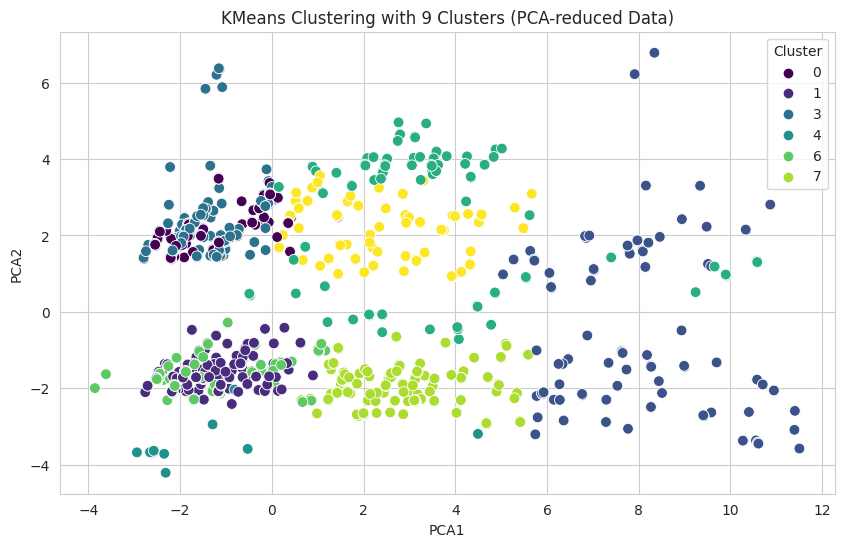

In [ ]:
# Ensure scaled_data corresponds to the actual dataset
# Select numerical columns and preprocess them
numerical_columns = main_class_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(main_class_data[numerical_columns])

# Reapply KMeans with the optimal number of clusters
optimal_n_clusters = 9  # As identified from silhouette scores
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)  # Explicitly set `n_init` to suppress warning
kmeans_optimal.fit(scaled_data)

# Add the optimal cluster labels to the original data
main_class_data['Optimal_Cluster'] = kmeans_optimal.labels_

# Visualize the optimal clusters using PCA
pca = PCA(n_components=2)
pca_data_optimal = pca.fit_transform(scaled_data)

# Create a DataFrame for visualization
pca_df_optimal = pd.DataFrame(data=pca_data_optimal, columns=['PCA1', 'PCA2'])
pca_df_optimal['Optimal_Cluster'] = kmeans_optimal.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Optimal_Cluster', data=pca_df_optimal, palette='viridis', s=60)
plt.title(f'KMeans Clustering with {optimal_n_clusters} Clusters (PCA-reduced Data)')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

# Clustering Classification Using Train-Test Split

- The `Optimal_Cluster` column, which serves as the target (`y`), is not included in the features ({X`).  
- To maintain cluster distribution, data is stratified into training (80%) and testing (20%) sets.  

- For verification, the shapes of `X_train` and `X_test` are printed.  



In [ ]:
X = main_class_data.drop(columns=['Optimal_Cluster'])  # Drop the cluster label column
y = main_class_data['Optimal_Cluster']                # Use cluster labels as the target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)

Training set shape (X_train): (1347, 35305)
Testing set shape (X_test): (337, 35305)


# Cluster Prediction Using the Random Forest Classifier

With the exception of `Optimal_Cluster`, which acts as the target (`y`), `X` has all features.  
2. **Train-Test Split**: Stratified data is divided into training (80%) and testing (20%) groups.  

3. **Model Training**: The training set is used to train a Random Forest Classifier.  
4. **Evaluation** To evaluate performance, a confusion matrix, classification report, and model correctness are produced.



Random Forest Classifier Performance:
Accuracy: 0.9910979228486647

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00         3
           5       0.95      0.95      0.95        21
           6       1.00      0.98      0.99        48
           7       0.97      1.00      0.99        37
           8       0.96      0.96      0.96        23

    accuracy                           0.99       337
   macro avg       0.99      0.99      0.99       337
weighted avg       0.99      0.99      0.99       337



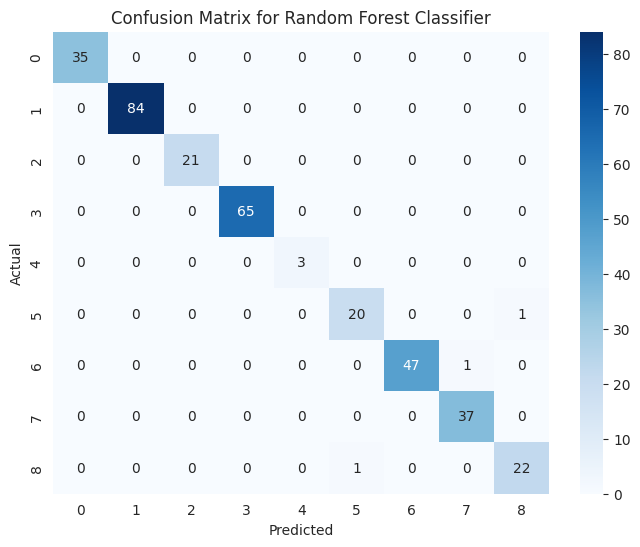

In [ ]:
# Step 1: Define features (X) and target (y)
X = main_class_data.drop(columns=['Optimal_Cluster'])  # Drop the cluster label column
y = main_class_data['Optimal_Cluster']                # Use cluster labels as the target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cluster Prediction Using the Random Forest Classifier

1. With the exception of `Optimal_Cluster`, which acts as the target (`y`), `X` has all features.  
2. **Train-Test Split**: Stratified data is divided into training (80%) and testing (20%) groups.  

3. **Model Training**: The training set is used to train a Random Forest Classifier.  
4. **Evaluation** To evaluate performance, a confusion matrix, classification report, and model correctness are produced.



SVM Classifier Performance with Best Parameters:
Accuracy: 0.9881305637982196

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.99      0.99        84
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00         3
           5       0.95      0.95      0.95        21
           6       1.00      1.00      1.00        48
           7       0.97      1.00      0.99        37
           8       0.95      0.91      0.93        23

    accuracy                           0.99       337
   macro avg       0.98      0.98      0.98       337
weighted avg       0.99      0.99      0.99       337



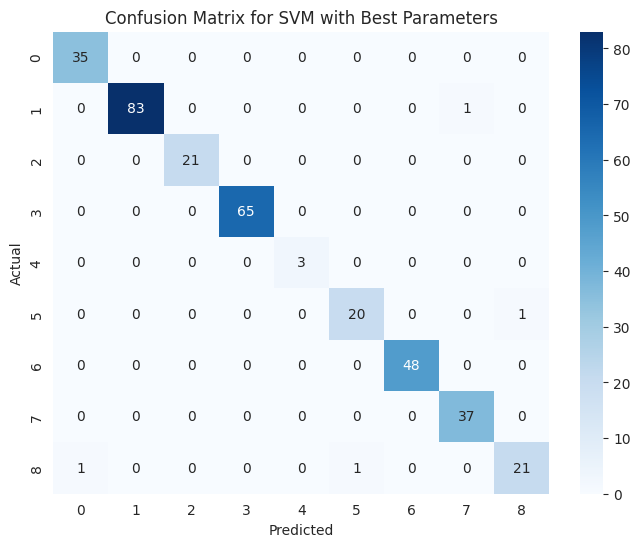

In [ ]:
# Step 1: Train SVM directly with the best parameters
svm_model = SVC(C=10, gamma=1, kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Step 2: Evaluate the model
y_pred = svm_model.predict(X_test)

# Step 3: Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
print("SVM Classifier Performance with Best Parameters:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 4: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for SVM with Best Parameters")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Ensemble Model: SVM and Random Forest

1. **Model Setup**: SVM and Random Forest classifiers were defined as the ensemble's foundational models.  
2. **Ensemble Creation**: To take advantage of projected probabilities, models were combined using `VotingClassifier` and soft voting.  

3. The ensemble model was trained, accuracy was assessed, and a classification report was produced.  
4. **Confusion Matrix**: A heatmap contrasting expected and actual labels was used to visualise model performance.  



Ensemble Model Performance:
Accuracy: 0.9910979228486647

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00         3
           5       0.95      0.95      0.95        21
           6       1.00      0.98      0.99        48
           7       0.97      1.00      0.99        37
           8       0.96      0.96      0.96        23

    accuracy                           0.99       337
   macro avg       0.99      0.99      0.99       337
weighted avg       0.99      0.99      0.99       337



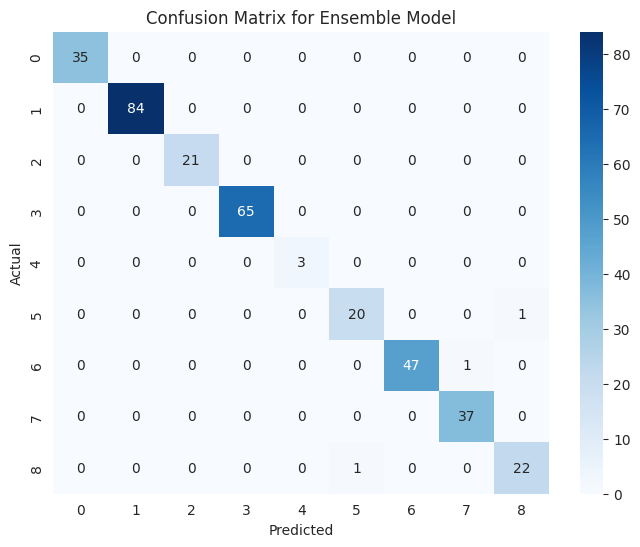

In [ ]:
# Step 3: Define individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(C=10, gamma=1, kernel='linear', class_weight='balanced', probability=True, random_state=42)

# Step 4: Create an ensemble using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('SVM', svm_model)
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)

# Step 5: Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Step 6: Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Step 7: Evaluate the ensemble model
print("Ensemble Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))

# Step 8: Display Confusion Matrix
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Latent Space Clustering Autoencoder

1. **Data Preprocessing**: To ensure consistent scaling, standardise training data using `StandardScaler`.  
2. **Autoencoder Architecture**: To compress and reconstruct input characteristics, an autoencoder with a 10-dimensional latent space was designed.  

3. **Training**: Using a validation split for monitoring, the autoencoder was trained to minimise reconstruction loss (MSE).  
4. KMeans clustering was applied to latent space representations, which were then visualised using t-SNE for 2D projection.  
5. **Evaluation**: To evaluate the quality of data reconstruction, reconstruction errors (MSE and MAE) were calculated.  



Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 35305)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_1 (Dense)               │ (None, 128)            │     4,519,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_2 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_layer (Dense)            │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_1 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_2 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 35305)          │     4,554,345 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,091,443 (34.68 MB)

 Trainable params: 9,091,443 (34.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


I0000 00:00:1732465647.047947     104 service.cc:145] XLA service 0x7b6f90004af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732465647.048026     104 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732465647.048032     104 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2968

I0000 00:00:1732465649.186280     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 543ms/step - loss: 0.2966 - val_loss: 0.2926
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2933 - val_loss: 0.2873
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2805 - val_loss: 0.2718
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2351 - val_loss: 0.2319
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1336 - val_loss: 0.1661
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0558 - val_loss: 0.1193
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0469 - val_loss: 0.0952
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0473 - val_loss: 0.0816
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0467 - val_loss: 0.0739
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0469 - val_loss: 0.0695
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0470 - val_loss: 0.0670
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0469 - val_loss: 0.0655
Epoch 13/50

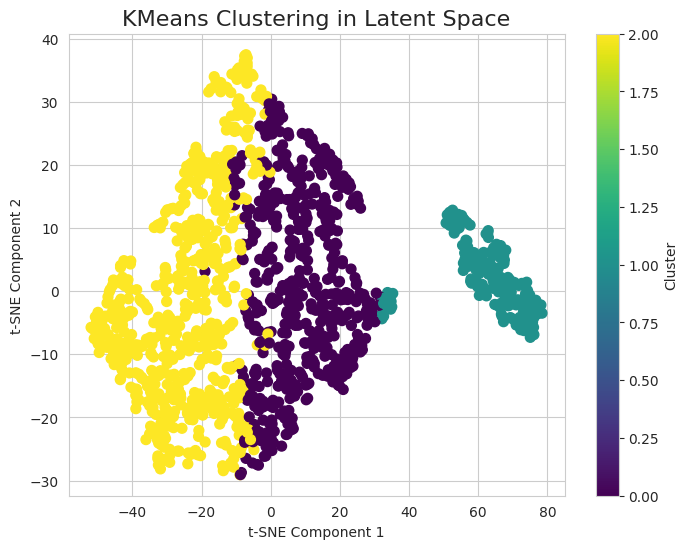

In [ ]:
# Step 1: Preprocess Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Define Autoencoder Architecture
input_dim = X_train_scaled.shape[1]
latent_dim = 10  # Latent space dimension

# Encoder
input_layer = Input(shape=(input_dim,), name='input_layer')
encoder = Dense(128, activation='relu', name='encoder_1')(input_layer)
encoder = Dense(64, activation='relu', name='encoder_2')(encoder)
latent_layer = Dense(latent_dim, activation='relu', name='latent_layer')(encoder)

# Decoder
decoder = Dense(64, activation='relu', name='decoder_1')(latent_layer)
decoder = Dense(128, activation='relu', name='decoder_2')(decoder)
output_layer = Dense(input_dim, activation='sigmoid', name='output_layer')(decoder)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=output_layer, name="Autoencoder")
encoder_model = Model(inputs=input_layer, outputs=latent_layer, name="Encoder")

# Compile Autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

# Step 3: Train Autoencoder
autoencoder.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

# Step 4: Extract Latent Space Representations
latent_space = encoder_model.predict(X_train_scaled)

# Step 5: Perform KMeans Clustering in Latent Space
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
initial_clusters = kmeans.fit_predict(latent_space)

# Step 6: Define Custom Clustering Loss
def clustering_loss(y_true, y_pred):
    """
    Clustering loss: KL divergence between target distribution and predicted soft assignments.
    """
    q = y_pred
    p = q ** 2 / K.sum(q, axis=0)
    p = K.transpose(K.transpose(p) / K.sum(p, axis=1))
    return K.mean(K.sum(p * K.log(p / q), axis=1))

# Step 7: Reconstruct the Data
X_train_reconstructed = autoencoder.predict(X_train_scaled)

# Step 8: Compute Reconstruction Errors
mse = mean_squared_error(X_train_scaled, X_train_reconstructed)
mae = mean_absolute_error(X_train_scaled, X_train_reconstructed)

# Step 9: Display Results
print(f"Reconstruction Mean Squared Error (MSE): {mse:.4f}")
print(f"Reconstruction Mean Absolute Error (MAE): {mae:.4f}")

latent_space_2d = TSNE(n_components=2, random_state=42).fit_transform(latent_space)

plt.figure(figsize=(8, 6))
plt.scatter(
    latent_space_2d[:, 0],
    latent_space_2d[:, 1],
    c=initial_clusters,
    cmap='viridis',
    s=50
)
plt.title("KMeans Clustering in Latent Space", fontsize=16)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Latent Space Deep Embedded Clustering (DEC)

1. **Latent Space Extraction**: standardised the encoder's representations for grouping.  
2. In order to initialise cluster centres and establish them as weights in the DEC model, KMeans was utilised.  

3. Using a softmax clustering layer, a DEC model was constructed and initialised using cluster weights.  
4. **Training and Refinement**: A target distribution based on initial cluster assignments was used to train the DEC model.  
5. **Evaluation and Visualisation**: Using t-SNE projections, cluster assignments were visualised and clustering was assessed using silhouette scores.  



43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5600
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5491 
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5627 
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5462 
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5312 
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5354 
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5286 
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5269 
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5189 
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5148 
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5205 
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4972 
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5210 
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0

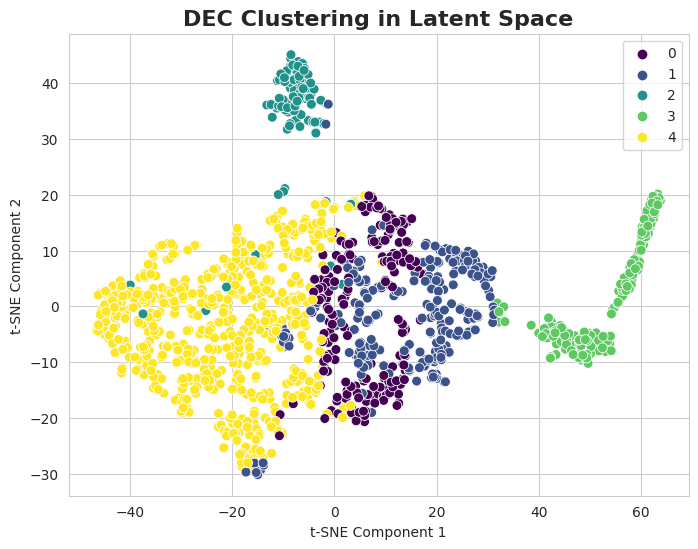

In [ ]:
# Step 1: Use Latent Space as Input for Clustering
latent_space = encoder_model.predict(X_train_scaled)  # Obtain latent space representations
latent_dim = latent_space.shape[1]
n_clusters = 5  # Number of clusters

# Step 2: Standardize the Latent Space
latent_space_standardized = StandardScaler().fit_transform(latent_space)

# Step 3: Perform KMeans Clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20, random_state=42)
kmeans.fit(latent_space_standardized)

# Step 4: Build DEC Model
# Define input for DEC model based on latent space
latent_input = Input(shape=(latent_dim,), name='latent_input')

# Clustering layer
clustering_layer = Dense(n_clusters, activation='softmax', name='clustering')(latent_input)

# Build the DEC model
dec_model = Model(inputs=latent_input, outputs=clustering_layer, name="DEC_Model")

# Step 5: Initialize Cluster Centers as Weights
cluster_centers = kmeans.cluster_centers_  # Cluster centers from KMeans
cluster_weights = [cluster_centers.T, np.zeros((n_clusters,))]  # Transpose cluster centers and initialize biases to zero
dec_model.get_layer(name='clustering').set_weights(cluster_weights)

# Step 6: Compile DEC Model
# Use categorical cross-entropy instead of KL divergence for numerical stability
dec_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')

# Step 7: Train DEC Model
# Create dummy labels for clustering loss
# Modify dummy labels to initialize with soft assignments
q = dec_model.predict(latent_space_standardized)
p = q**2 / np.sum(q, axis=0)  # Target distribution
p = (p.T / np.sum(p, axis=1)).T  # Normalize

# Train DEC
dec_model.fit(
    latent_space_standardized,
    p,  # Use the target distribution as labels
    epochs=50,
    batch_size=64,
    verbose=1
)

# Step 8: Refine Clustering Assignments
refined_cluster_assignments = np.argmax(dec_model.predict(latent_space_standardized), axis=1)

# Step 9: Evaluate Clustering Performance
unique_clusters = np.unique(refined_cluster_assignments)
if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(latent_space_standardized, refined_cluster_assignments)
    print("Silhouette Score for DEC Clustering:", silhouette_avg)
else:
    print(f"Silhouette Score cannot be computed: only one cluster found ({unique_clusters[0]}).")

# Step 10: Visualize Clustering in 2D Latent Space
latent_space_2d = TSNE(n_components=2, random_state=42).fit_transform(latent_space_standardized)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=latent_space_2d[:, 0],
    y=latent_space_2d[:, 1],
    hue=refined_cluster_assignments,
    palette='viridis',
    s=50
)
plt.title("DEC Clustering in Latent Space", fontsize=16, weight='bold')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Random Forest Classifier SHAP Interpretation

1. **Model Training**: `X_train` and `y_train` are used to train a Random Forest Classifier.  
2. **SHAP Initialisation**: To calculate feature importance, a SHAP `TreeExplainer` is initialised for the Random Forest model.  

3. **SHAP Values Calculation** To guarantee constant feature alignment with training data, SHAP values are computed for the test dataset (`X_test_processed`).  
4. **Instance Interpretation**: A particular test instance is chosen and its contribution to a class is the main focus of the explanation.  
5. **Visualisation**: To show how each feature affects the model's prediction for the selected instance, a SHAP waterfall plot is created.  



SHAP values output structure: 9 classes


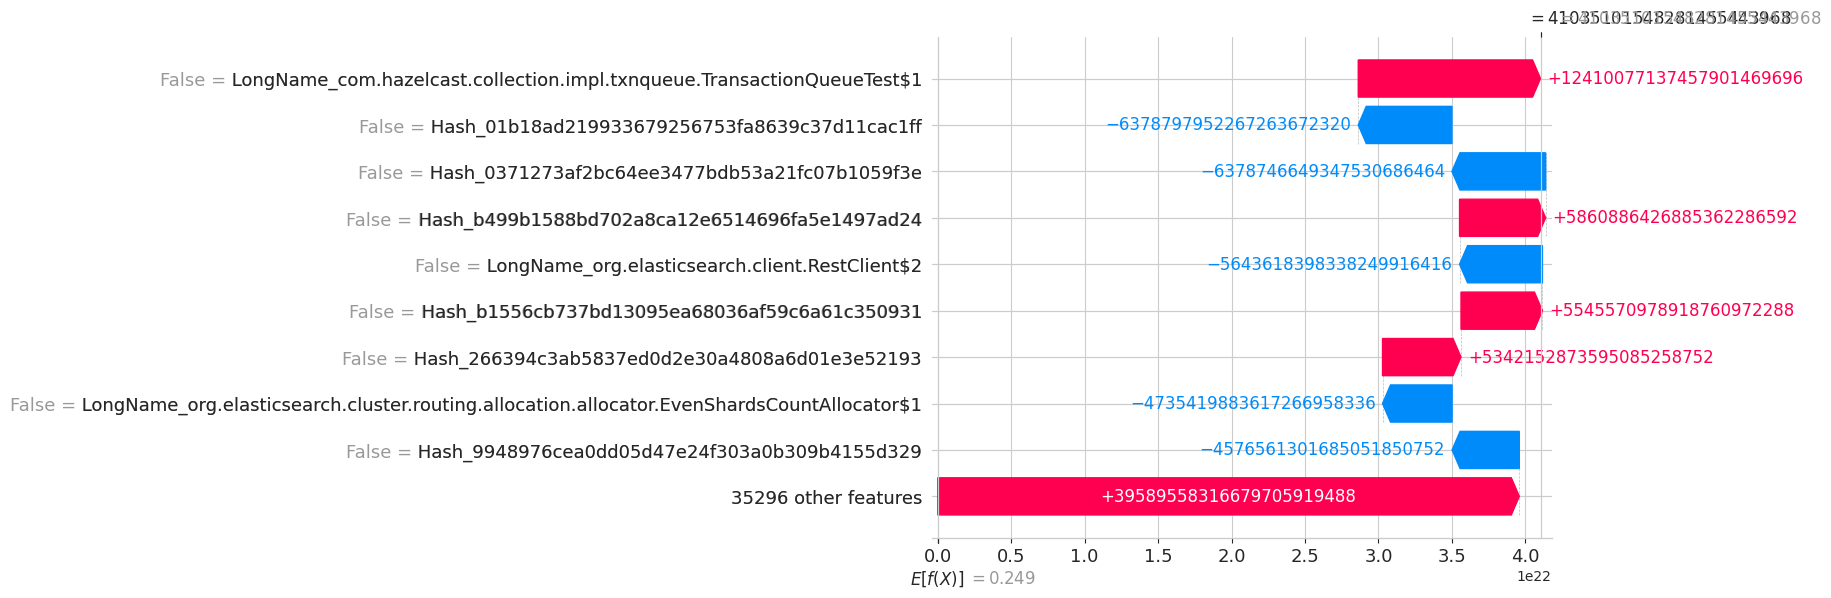

In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Ensure X_test has the same feature set and scaling as X_train
X_test_processed = pd.DataFrame(X_test, columns=X_train.columns)

# Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(rf_model, check_additivity=False)

# Ensure the input data for SHAP values matches the training data format
assert X_test_processed.shape[1] == X_train.shape[1], "Feature mismatch between training and test data."

# Calculate SHAP values for the test data (disable additivity check here too)
shap_values = explainer.shap_values(X_test_processed, check_additivity=False)

# Check the output structure of SHAP values
print(f"SHAP values output structure: {len(shap_values)} classes")

# Select a specific instance for interpretation
instance_index = 0  # Change this index to explain other instances
class_index = 1  # Adjust class index for multiclass classification

# For multiclass classification, choose the SHAP values for a specific class
shap_value_for_instance = shap_values[class_index][instance_index]
instance = X_test_processed.iloc[instance_index]

# Generate the waterfall plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_value_for_instance,
        base_values=explainer.expected_value[class_index],
        data=instance,
        feature_names=X_train.columns
    )
)

# Comparative Evaluation: Ensemble, SVM, and Random Forest

- SVM, Random Forest, and an ensemble model with soft voting were trained.  
Accuracy, precision, recall, and F1-score were used to evaluate the models.  

- Metrics were shown in a table and plotted in a bar chart for comparison.  



           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.991098   0.991176  0.991098  0.991102
1            SVM  0.988131   0.988156  0.988131  0.988063
2       Ensemble  0.991098   0.991176  0.991098  0.991102


<Figure size 1200x800 with 0 Axes>

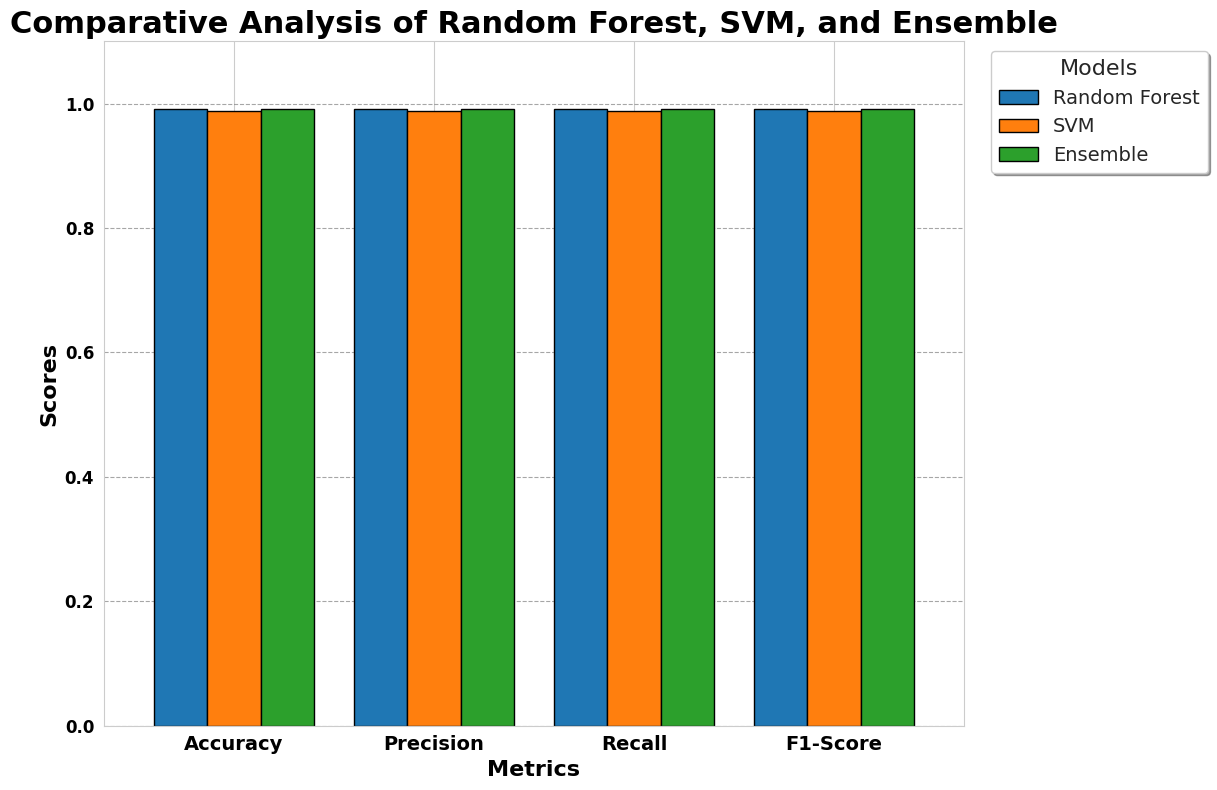

In [ ]:
# Step 1: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)  # Train the Random Forest model

# Random Forest Metrics
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Step 2: Train SVM
svm_model = SVC(C=10, gamma=1, kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)  # Train the SVM model

# SVM Metrics
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Step 3: Train Ensemble Model
ensemble_model = VotingClassifier(
    estimators=[('Random Forest', rf_model), ('SVM', svm_model)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)  # Train the ensemble model

# Ensemble Model Metrics
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble, average='weighted')
ensemble_recall = recall_score(y_test, y_pred_ensemble, average='weighted')
ensemble_f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Comparative Metrics Table
metrics_comparison = {
    'Model': ['Random Forest', 'SVM', 'Ensemble'],
    'Accuracy': [rf_accuracy, svm_accuracy, ensemble_accuracy],
    'Precision': [rf_precision, svm_precision, ensemble_precision],
    'Recall': [rf_recall, svm_recall, ensemble_recall],
    'F1-Score': [rf_f1, svm_f1, ensemble_f1]
}
metrics_df = pd.DataFrame(metrics_comparison)

# Display metrics
print(metrics_df)

# Enhanced Vertical Metrics Plot
plt.figure(figsize=(12, 8))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Vibrant colors for each metric

# Transpose the data for vertical grouping
metrics_df.set_index('Model').T.plot(kind='bar', figsize=(12, 8), color=bar_colors, edgecolor='black', width=0.8)

# Title and labels
plt.title("Comparative Analysis of Random Forest, SVM, and Ensemble", fontsize=22, weight='bold', color='black')
plt.ylabel("Scores", fontsize=16, weight='bold', color='black')
plt.xlabel("Metrics", fontsize=16, weight='bold', color='black')
plt.xticks(fontsize=14, weight='bold', rotation=0, color='black')  # Horizontal x-axis labels
plt.yticks(fontsize=12, weight='bold', color='black')
plt.ylim(0, 1.1)  # Set y-axis limit slightly above 1 for spacing
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

# Add legend
plt.legend(metrics_df['Model'], fontsize=14, title='Models', title_fontsize=16, loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True, shadow=True)
plt.tight_layout()
plt.show()